In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
    
https://towardsdatascience.com/trend-seasonality-moving-average-auto-regressive-model-my-journey-to-time-series-data-with-edc4c0c8284b

https://towardsdatascience.com/decomposing-a-time-series-in-a-simple-and-intuitive-way-19d3213c420b


In [2]:
n=50
noise = np.random.normal(0,0.2,n)
time=np.arange(0,n)*2
Y=[math.sin(x*math.pi/10) for x in range(0,n)]
X=Y+noise
d={'time':time,'price':X,'price_Wo_N':Y}
df=pd.DataFrame(d)

In [130]:
df.head()

,time,price,price_Wo_N
0,0,-0.314472,0.000000
1,2,0.319419,0.309017
2,4,0.472425,0.587785
3,6,1.023783,0.809017
4,8,1.061343,0.951057


In [33]:
df.index

RangeIndex(start=0, stop=50, step=1)

In [31]:
def MA(X,p):
    n=len(X)
    q=n-p+1
    M=[]
    for i in range(0,q):
        M.append(X[i:p+i].mean())
    return M 

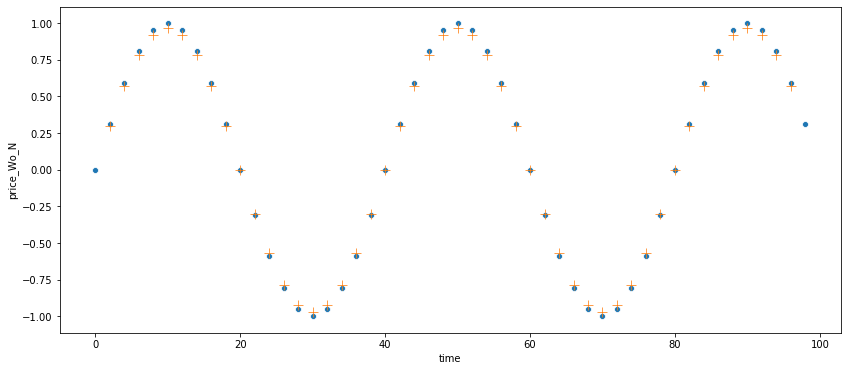

In [4]:
p=3
plt.figure(figsize=(14,6))
sn.scatterplot(x='time',y='price_Wo_N',data=df)
sn.scatterplot(x=MA(df.time,p),y=MA(df.price_Wo_N,p),marker="+",s=100)
#sn.lineplot(x='time',y='price_Wo_N',data=df)

In [116]:
n=50
time=np.arange(0,n)*2
trend=2*time+0.1
seas=[30*math.sin(x*math.pi/10) for x in range(0,n)]
noise = 5*np.random.normal(0,1,n)
level=3

X=level+trend+seas+noise

Y=level+trend+seas
d={'time':time,'price':X,'price_Wo_N':Y}
df=pd.DataFrame(d)

In [51]:
len(df)

50

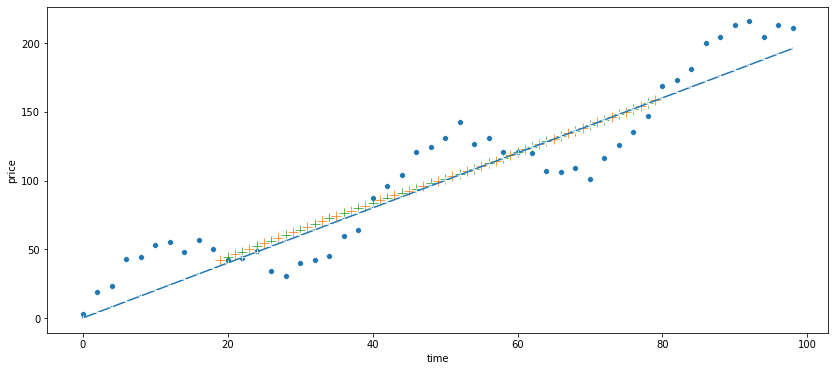

In [119]:
p=20
plt.figure(figsize=(14,6))
sn.scatterplot(x='time',y='price',data=df)
sn.scatterplot(x=MA(df.time,p),y=MA(df.price,p),marker="+",s=100)
sn.lineplot(x=time,y=trend,marker="+")
sn.scatterplot(x=MA(np.array(MA(df.time,p)),2),y=MA(np.array(MA(df.price,p)),2),marker="+",s=100)

In [115]:
from statsmodels.tsa.seasonal import seasonal_decompose


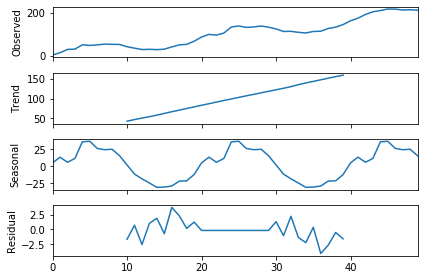

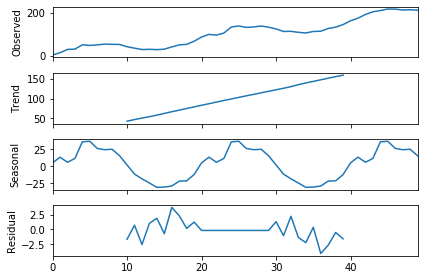

In [107]:
seasonal_decompose(df.price, model='additive', freq=20).plot()

In [47]:
#import necessary packages
from math import *
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas_datareader import data

#download Apple price data into DataFrame
apple = data.DataReader('AAPL', 'yahoo',start='1/1/2000')

#calculate the compound annual growth rate (CAGR) which 
#will give us our mean return input (mu) 
days = (apple.index[-1] - apple.index[0]).days
cagr = ((((apple['Adj Close'][-1]) / apple['Adj Close'][1])) ** (365.0/days)) - 1
print ('CAGR =',str(round(cagr,4)*100)+"%")
mu = cagr

#create a series of percentage returns and calculate 
#the annual volatility of returns
apple['Returns'] = apple['Adj Close'].pct_change()
vol = apple['Returns'].std()*sqrt(252)
print ("Annual Volatility =",str(round(vol,4)*100)+"%")

#Define Variables
S = apple['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.2309 #Return
vol = 0.4259 #Volatility
#create list of daily returns using random normal distribution
daily_returns=np.random.normal((mu/T),vol/math.sqrt(T),T)+1
#set starting price and create price series generated by above random daily returns
price_list = [S]
for x in daily_returns:
    price_list.append(price_list[-1]*x)
#Generate Plots - price series and histogram of daily returns
#plt.plot(price_list)
#plt.show()

CAGR = 23.669999999999998%
Annual Volatility = 40.57%


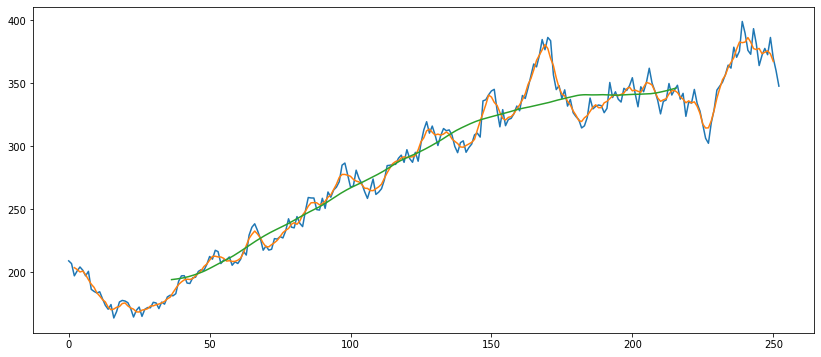

In [130]:
p=5
n=len(price_list)
plt.figure(figsize=(14,6))
sn.lineplot(x=np.arange(0,n),y=price_list)
sn.lineplot(x=MA(np.arange(0,n),p),y=MA(np.array(price_list),p))
sn.lineplot(x=MA(np.array(MA(np.arange(0,n),p)),70),y=MA(np.array(MA(np.array(price_list),p)),70))

In [42]:
MA(np.array(MA(np.arange(0,n),p)),2)

[15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0,
 139.0,
 140.0,
 141.0,
 142.0,
 143.0,
 144.0,
 145.0,
 146.0,
 147.0,
 148.0,
 149.0,
 150.

In [7]:
t = np.arange(1, 20) # t
serie =np.cos((2*np.pi*t)/8)

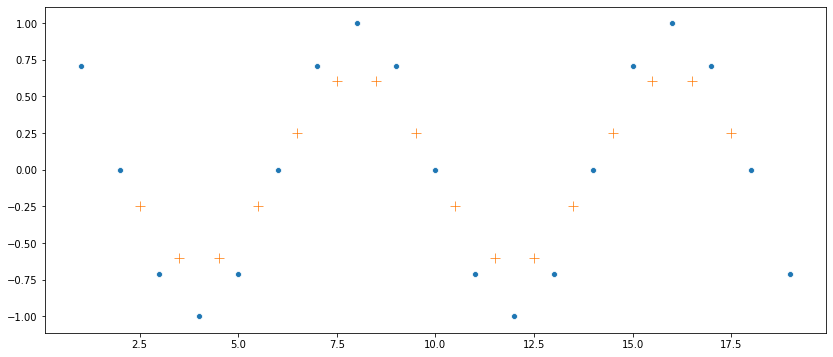

In [9]:
p=4
plt.figure(figsize=(14,6))
sn.scatterplot(x=t,y=serie)
sn.scatterplot(x=MA(t,p),y=MA(serie,p),marker="+",s=100)


https://perso.math.univ-toulouse.fr/jydauxoi/files/2017/04/poly_eleves.pdf
    
https://www.math.u-psud.fr/~goude/Materials/ProjetMLF/time_series.html    

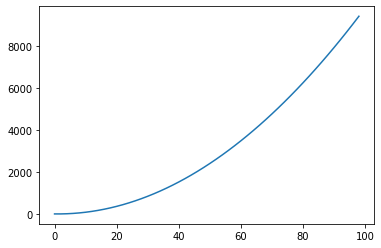

In [65]:
t = np.arange(-10,10)
sn.lineplot(x=time,y=time**2-2*time+0.1)

**Si la série chronologique possède une composante saisonnière de période p,
alors l’application d’une moyenne mobile d’ordre p supprime cette saisonnalité. On se servira donc d’une moyenne mobile d’ordre p pour  ́eliminer une composante saisonnière de période p.**

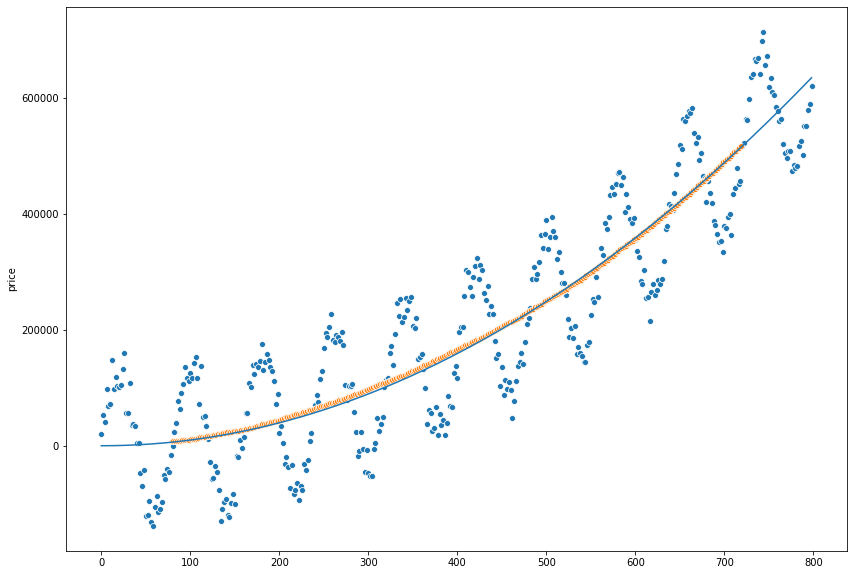

In [125]:

p=80
plt.figure(figsize=(14,10))

n=400
time=np.arange(0,n)*2
trend=time**2-2*time+0.1
seas=[50**3*math.sin(x*math.pi/20) for x in range(0,n)]
noise = 2000*np.random.normal(0,10,n)
level=3

X=level+trend+seas+noise

Y=level+trend+seas
d={'time':time,'price':X,'price_Wo_N':Y}
df2=pd.DataFrame(d)

sn.scatterplot(x=time,y=df2.price)
sn.lineplot(x=time,y=trend)
sn.scatterplot(x=MA(df2.time,p),y=MA(df2.price,p))


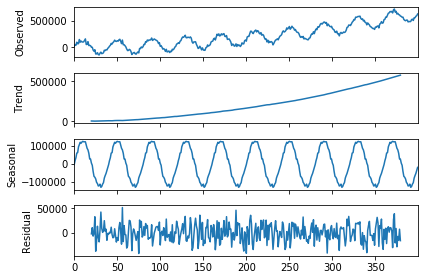

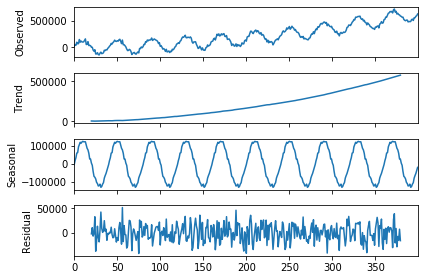

In [126]:
result = seasonal_decompose(df2.price, model='additive', freq=40)
result.plot()